# Exploratory Data Analysis

In [3]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import pandas as pd
import nltk

In [8]:
video_data = pd.read_csv("dataset/USvideos.csv")
video_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## Aggregating Stats Based On Category

Keep in mind category_id is a nominal variable so we're just looking to see if any discerning factors between the category and their stats as opposed to like a linear relationship or something.

In [10]:
#pull out category and stats
cat_stats = video_data[["category_id", "views", "likes", "dislikes", "comment_count"]]
cat_stats.head()

,category_id,views,likes,dislikes,comment_count
0,22,748374,57527,2966,15954
1,24,2418783,97185,6146,12703
2,23,3191434,146033,5339,8181
3,24,343168,10172,666,2146
4,24,2095731,132235,1989,17518


In [17]:
#group by category
grouped_cat_stats = cat_stats.groupby(["category_id"]).mean().reset_index()

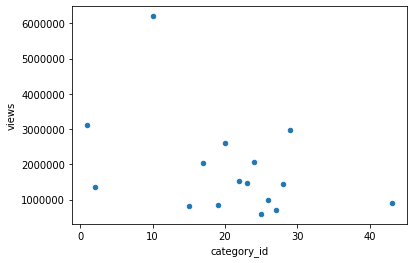

In [18]:
#category vs views
grouped_cat_stats.plot.scatter("category_id","views")

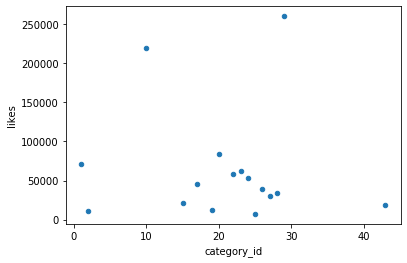

In [19]:
#category vs likes
grouped_cat_stats.plot.scatter("category_id","likes")

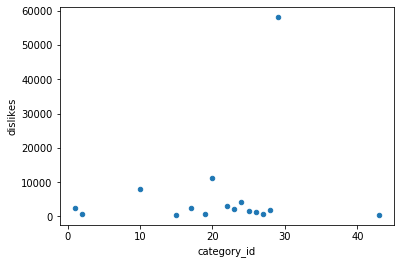

In [22]:
#category vs dislikes
grouped_cat_stats.plot.scatter("category_id","dislikes")

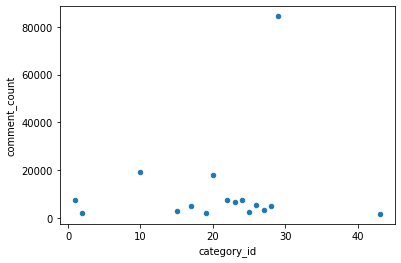

In [21]:
#category vs comment_count
grouped_cat_stats.plot.scatter("category_id","comment_count")

Because we have this blob in the middle with very similar statistics for a lot of different categories, I don't think this may be a feasible idea. let me know if you guys have a solution or something I missed!


## Tags Stuff

In [84]:
import json

category_map = {}
data = {}
with open('dataset/US_category_id.json', 'r') as outfile:
    data = json.load(outfile)
    for item in data["items"]:
        category_map[item["id"]] = item["snippet"]["title"]
    

In [85]:
category_map

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [25]:
tags = video_data["tags"]

In [40]:
len(tags)

40949

In [45]:
tags[1]

'last week tonight trump presidency|"last week tonight donald trump"|"john oliver trump"|"donald trump"'

In [46]:
tags[2]

'racist superman|"rudy"|"mancuso"|"king"|"bach"|"racist"|"superman"|"love"|"rudy mancuso poo bear black white official music video"|"iphone x by pineapple"|"lelepons"|"hannahstocking"|"rudymancuso"|"inanna"|"anwar"|"sarkis"|"shots"|"shotsstudios"|"alesso"|"anitta"|"brazil"|"Getting My Driver\'s License | Lele Pons"'

In [47]:
tags[3]

'rhett and link|"gmm"|"good mythical morning"|"rhett and link good mythical morning"|"good mythical morning rhett and link"|"mythical morning"|"Season 12"|"nickelback lyrics"|"nickelback lyrics real or fake"|"nickelback"|"nickelback songs"|"nickelback song"|"rhett link nickelback"|"gmm nickelback"|"lyrics (website category)"|"nickelback (musical group)"|"rock"|"music"|"lyrics"|"chad kroeger"|"canada"|"music (industry)"|"mythical"|"gmm challenge"|"comedy"|"funny"|"challenge"'

In [29]:
video_data["category_id"][0]

22

In [113]:
tags_df = pd.DataFrame()
tags_df.head()

""


In [114]:
interested_cats = set([1, 17, 28])

In [115]:
tags_df = pd.DataFrame()

for i in range(len(tags)):
    if i % 10000 == 0:
        print(i)
    category = video_data["category_id"][i]
    if category in interested_cats:
        ls = tags[i]
        individual_tags = ls.split("|")
        for it in individual_tags[0:5]:
            if it != '[none]':
                tags_df = tags_df.append({"Tag Name": it, "Category": category}, ignore_index=True)

0
10000
20000
30000
40000


In [116]:
tags_df

,Category,Tag Name
0,28.0,ijustine
1,28.0,"""week with iPhone X"""
2,28.0,"""iphone x"""
3,28.0,"""apple"""
4,28.0,"""iphone"""
...,...,...
31945,1.0,Black Panther
31946,1.0,"""HISHE"""
31947,1.0,"""Marvel"""
31948,1.0,"""Infinity War"""


In [117]:
grouped_cat_count = tags_df.groupby(["Category"]).count().reset_index()
grouped_cat_count

,Category,Tag Name
0,1.0,10719
1,17.0,10351
2,28.0,10880


In [126]:
grouped_tag_count = tags_df.groupby(["Tag Name"]).count().reset_index()
grouped_tag_count = grouped_tag_count.rename(columns={"Category": "count"})
final_df = grouped_tag_count.sort_values(by=['count'], ascending=False)
final_df.head()

,Tag Name,count
973,"""basketball""",325
3039,nba,253
1516,"""highlights""",185
891,"""amazing""",158
2525,"""wrestling""",157


## Classification via Tags

In [127]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split

In [144]:
df = video_data[['tags', 'category_id']]
df.loc[:, "tags"] = df['tags'].apply(lambda x: x.lower())
df.loc[:, "tags"]  = df['tags'].str.replace(r'[^\w\s|]', '')
df.loc[:, "tags"]  = df['tags'].str.replace('|', ' ')

In [146]:
X_train, X_test, y_train, y_test = train_test_split(df['tags'], df['category_id'], test_size=0.25, shuffle=True)

In [147]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X_train)
y = y_train
dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [148]:
y_pred = dt.predict(tfidf.transform(X_test))
metrics.accuracy_score(y_test, y_pred)

0.9666927134205899

- tags and views
- sentiment analysis 

## Time Till Trending

In [179]:
from datetime import datetime
import matplotlib.pyplot as plt

In [153]:
trending_date = video_data["trending_date"]
publish_time = video_data["publish_time"]

In [151]:
trending_date[0], publish_time[0]

('17.14.11', '2017-11-13T17:13:01.000Z')

In [170]:
a = datetime.strptime(trending_date[0], '%y.%d.%m')
b = datetime.strptime(publish_time[0], "%Y-%m-%dT%H:%M:%S.%fZ")

In [172]:
a - b

datetime.timedelta(seconds=24419)

In [182]:
time_difs = []

for i in range(len(trending_date)):
    td = datetime.strptime(trending_date[i], '%y.%d.%m')#'Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
    pt = datetime.strptime(publish_time[i], "%Y-%m-%dT%H:%M:%S.%fZ")
    time_difs.append((td - pt).total_seconds())


In [183]:
time_difs[0:4]

[24419.0, 59400.0, 104076.0, 46796.0]

In [185]:
np.mean(time_difs)

1401713.2362206648

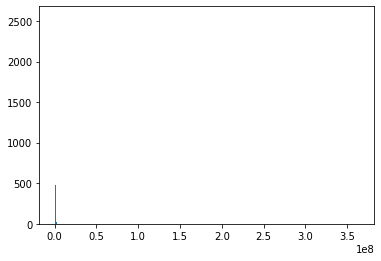

In [184]:
plt.hist(time_difs, bins='auto')
plt.show()

In [193]:
video_data_with_time_difs = video_data.copy()
video_data_with_time_difs["time_to_trending"] = time_difs

In [195]:
video_data_with_time_difs.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,time_to_trending
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,24419.0
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",59400.0
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,104076.0
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,46796.0
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,107899.0


In [197]:
trim_vid_data = video_data_with_time_difs[["title", "category_id", "views", "likes", "dislikes","comment_count", "time_to_trending"]]
trim_vid_data.head()

,title,category_id,views,likes,dislikes,comment_count,time_to_trending
0,WE WANT TO TALK ABOUT OUR MARRIAGE,22,748374,57527,2966,15954,24419.0
1,The Trump Presidency: Last Week Tonight with J...,24,2418783,97185,6146,12703,59400.0
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",23,3191434,146033,5339,8181,104076.0
3,Nickelback Lyrics: Real or Fake?,24,343168,10172,666,2146,46796.0
4,I Dare You: GOING BALD!?,24,2095731,132235,1989,17518,107899.0


In [226]:
trim_vid_data.loc[:, "title"] = trim_vid_data['title'].apply(lambda x: x.lower())
trim_vid_data.loc[:, "title"]  = trim_vid_data['title'].str.replace(r'[^\w\s]', '')
trim_vid_data.head()

/Users/frys/Documents/MIDS/w207/w207/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,title,category_id,views,likes,dislikes,comment_count,time_to_trending
0,we want to talk about our marriage,22,748374,57527,2966,15954,24419.0
1,the trump presidency last week tonight with jo...,24,2418783,97185,6146,12703,59400.0
2,racist superman rudy mancuso king bach lele ...,23,3191434,146033,5339,8181,104076.0
3,nickelback lyrics real or fake,24,343168,10172,666,2146,46796.0
4,i dare you going bald,24,2095731,132235,1989,17518,107899.0


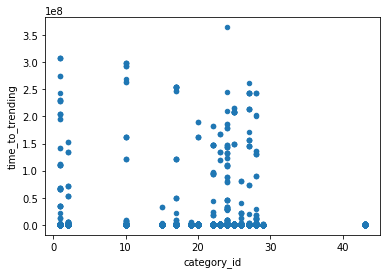

In [227]:
trim_vid_data.plot.scatter("category_id","time_to_trending")

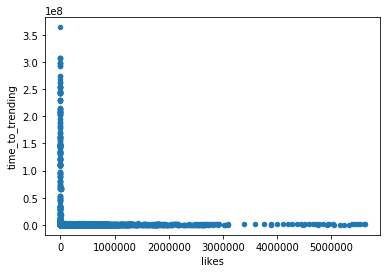

In [229]:
trim_vid_data.plot.scatter("likes","time_to_trending")

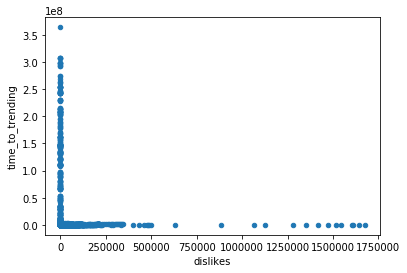

In [231]:
trim_vid_data.plot.scatter("dislikes","time_to_trending")

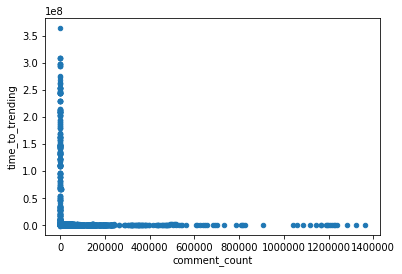

In [232]:
trim_vid_data.plot.scatter("comment_count","time_to_trending")

In [ ]:
trim_vid_data.plot.scatter("category_id","time_to_trending")

In [218]:
train_labels = trim_vid_data['time_to_trending']
train_data = trim_vid_data.drop(['time_to_trending', 'title'], axis = 1)

In [219]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.25, shuffle=True)

In [223]:
X_train.head()

,category_id,views,likes,dislikes,comment_count
30667,26,1471826,48877,3400,4478
9721,10,4903275,139621,19153,20488
1454,26,82596,1112,193,320
4963,19,554289,15105,567,3855
946,24,885011,16396,1363,2956


In [225]:
y_train.head()

30667    687756.0
9721     845999.0
1454     115195.0
4963     468000.0
946      392396.0
Name: time_to_trending, dtype: float64

In [220]:
# tfidf = TfidfVectorizer()
# X_train.head()
# tfidf.fit_transform(X_train["title"])

In [221]:
#tfidf = TfidfVectorizer()
# X_train.loc[:, "title"] = tfidf.fit_transform(X_train["title"])
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [222]:
y_pred = dt.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.0026372338347333464

In [233]:
y_pred[0:5]

array([7.03140000e+04, 6.01130000e+04, 2.08619000e+05, 1.31323400e+06,
       1.21844318e+08])

In [238]:
y_test[0:5]

21986        74706.0
33231       503443.0
21227       212391.0
36293      1226834.0
14185    121930718.0
Name: time_to_trending, dtype: float64

In [243]:
diffs = abs(y_pred - np.array(y_test))
np.median(diffs)

86461.0

In [246]:
np.mean(diffs)/(60 * 60)

191.53174806277266

In [247]:
np.median(diffs) / (60 * 60)

24.016944444444444

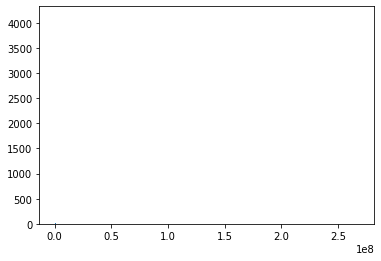

In [248]:
plt.hist(diffs, bins='auto')
plt.show()